<a href="https://colab.research.google.com/github/youminpark/NEUR265/blob/main/homework/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>.

4. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

5. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

6. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

7. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

8. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

9. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential?

10. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

11. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

12. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>.

13. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>.

14. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

15. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

16. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test.

17. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




#### Youmin Park
*NEUR 265: Intro to Neural Data Analysis*

**4 March 2024**

In [1]:
# Question 2: import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Question 3: create a Pandas dataframe from the csv
expanded_url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/data/patch_seq_expanded.csv'
patch_seq = pd.read_csv(expanded_url);

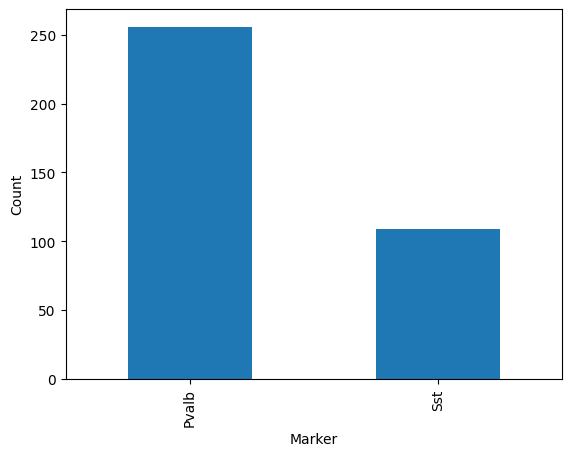

In [10]:
# Question 4: create a bar graph that displays the value counts
plot = patch_seq['Marker'].value_counts().plot(kind='bar')
plot.set_xlabel('Marker');
plot.set_ylabel('Count');

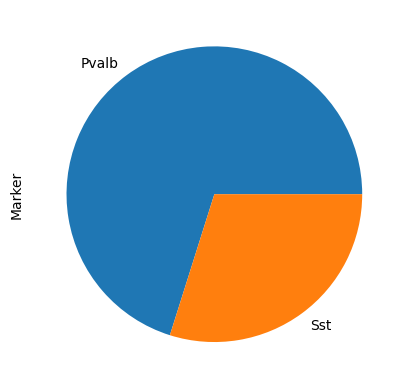

In [12]:
# Question 5: now make it a pie chart!
plot = patch_seq['Marker'].value_counts().plot(kind='pie')

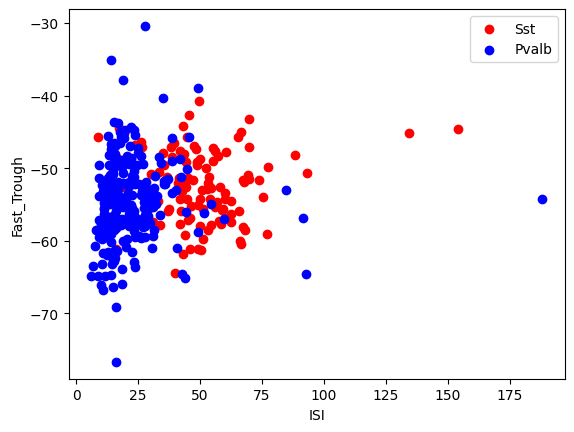

In [15]:
# Question 6: write a for loop to make a scatter plot
marker_type = patch_seq['Marker'].unique()

fig = plt.figure()

for m_type in marker_type:

    df = patch_seq[patch_seq['Marker'] == m_type]

    if m_type == 'Sst':
      plt.scatter(df['ISI'],
                  df['Fast_Trough'],
                  label=m_type, color = 'r');
    if m_type == 'Pvalb':
      plt.scatter(df['ISI'],
                  df['Fast_Trough'],
                  label=m_type, color = 'b');

plt.ylabel("Fast_Trough")
plt.xlabel("ISI")
plt.legend(loc='best')

plt.show()

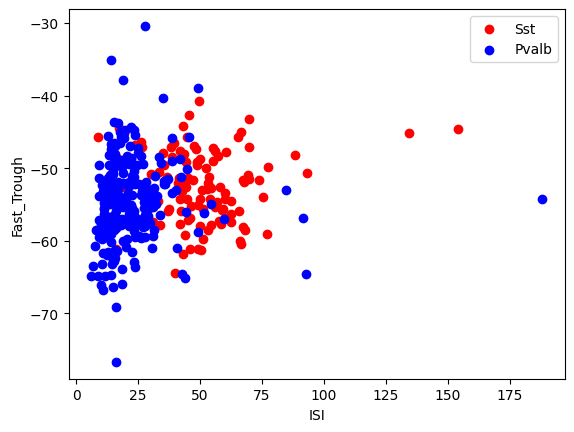

In [17]:
# Question 7: create patchScatter() function that does actions above
def patchScatter(patch_seq):
    marker_type = patch_seq['Marker'].unique()

    fig = plt.figure()

    for m_type in marker_type:

        df = patch_seq[patch_seq['Marker'] == m_type]

        if m_type == 'Sst':
          plt.scatter(df['ISI'],
                      df['Fast_Trough'],
                      label=m_type, color = 'r');
        if m_type == 'Pvalb':
          plt.scatter(df['ISI'],
                      df['Fast_Trough'],
                      label=m_type, color = 'b');

    plt.ylabel("Fast_Trough")
    plt.xlabel("ISI")
    plt.legend(loc='best')

    plt.show()

patchScatter(patch_seq);

In [19]:
# Question 8: give me the statistics! namely the mean, SD, range
print(patch_seq.groupby('Marker')['Fast_Trough'].describe()) ;

        count       mean       std        min        25%        50%  \
Marker                                                                
Pvalb   256.0 -54.548074  5.870670 -76.687508 -57.914063 -54.490629   
Sst     109.0 -52.514968  4.958103 -64.375008 -55.931252 -52.568752   

              75%        max  
Marker                        
Pvalb  -51.364065 -30.406252  
Sst    -48.500000 -40.781254  


#### Question 9: Differences across Marker Types?
* The Pvalb group has a more negative mean undershoot
* The dufference in mean is minor: there is an approx -2 mV difference

In [20]:
# Question 10: find the skew of the fast trough data w.r.t. marker type
patch_seq.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

#### Question 11: thoughts on the skew?
* Both data sets are normally distributed based on their reported values (within -0.5 and 0.5)
* The Pvalb data set seems to have greater skew, as its value is orders of magnitude greater than the Sst value.

In [21]:
# Question 12: Rinse and repeat for ISI
patch_seq.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.596386
Sst      1.857850
Name: ISI, dtype: float64

#### Question 13: thoughts on the skew? (the sequel)
* Both data sets are NOT normally distributed, as their skew values greatly exceed 0.5.
* The Pvalb data set again seems to have greater skew, as its value is roughly 3x that of the Sst value.

In [23]:
# Question 14: Fast_Trough t-test
sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']

print(stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough']));

TtestResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585, df=363.0)


#### Question 15: Analysis of Fast_Trough t-test results
* The p-value is 0.0017, which is significantly below the confidence level of 0.05. Therefore, there is a statistically significant difference in the undershoot voltages between the two groups.

In [25]:
# Question 16: ISI t-test
sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']

sst_neurons_cleaned = sst_neurons.dropna(subset=['ISI']);
pvalb_neurons_cleaned = pvalb_neurons.dropna(subset=['ISI']);

print(stats.ttest_ind(sst_neurons_cleaned['ISI'], pvalb_neurons_cleaned['ISI']));

TtestResult(statistic=14.643966775010774, pvalue=2.694292788633572e-38, df=354.0)


#### Question 17: Analysis of ISI t-test results
* The p-value is 2.69e-38, which is significantly below the confidence level of 0.05. This suggests that there is a statistically significant difference in the interspike intervals between the two groups.